## 0. Business Understanding / Business Model

- Airbnb was founded in 2017 and is an online platform that provide services to travellers and local host
-- Travellers: Book airbnb online 
-- Localhost: List empty / unliving space for rent
- After a booking is complete, airbnb make money from 3% transaction fee from travellers and 10% home rent from local host

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
lst = pd.read_csv('./Boston/listings.csv')
cal = pd.read_csv('./Boston/calendar.csv')

### 1. Data Cleaning

In [ ]:
def drop_na(df):
  ''' 
  Param - dataframe
  drop any column that has solely only 1 value counts or
  more than 75% or nan / null value
  ''' 
    for col in df.columns:
        if (df[col].isnull().sum()/df.shape[0] > 0.75) or (len(df[col].value_counts()) < 2):
            df.drop(col, axis=1, inplace=True)
            print(col + ' dropped')
    return None

In [ ]:
def drop_col(df, feature):
  '''
  param: dataframe, feature string 
  loop through columns in df, if the feat is in
  '''
    for col in df.columns:
        if feature in col:
            df.drop(col, axis=1, inplace=True)
            print(col + ' dropped')
    return None

In [ ]:
def price_conv(x):
  '''
  param: price string
  convert price from $xx to float() type
  '''
    return float(x[1:].replace(',',''))
                 
lst['price'].fillna('$0', inplace=True)
cal['price'].fillna('$0', inplace=True)
                                
lst['price'] = lst['price'].apply(price_conv)
cal['price'] = cal['price'].apply(price_conv)                 

In [ ]:
def rate_conv(x):
  '''
  convert rate to float
  %xx -> float()
  '''
    return float(x[:-1])

In [ ]:
## Drop any columns that has only 1 value count / more than 75% of null entries
drop_na(lst)
drop_na(cal)

scrape_id dropped
last_scraped dropped
experiences_offered dropped
neighbourhood_group_cleansed dropped
state dropped
country_code dropped
country dropped
square_feet dropped
weekly_price dropped
monthly_price dropped
has_availability dropped
calendar_last_scraped dropped
requires_license dropped
license dropped
jurisdiction_names dropped


In [ ]:
# Check to see if there's any column left and start cleaning data 
lst.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
 

In [ ]:
# Since url and id is very unique and can't be further evaluate
drop_col(lst, 'url')
drop_col(lst, 'id')

listing_url dropped
thumbnail_url dropped
medium_url dropped
picture_url dropped
xl_picture_url dropped
host_url dropped
host_thumbnail_url dropped
host_picture_url dropped
id dropped
host_id dropped
host_identity_verified dropped


In [ ]:
# Don't need any requirements such as id since it doesn't affect price much
drop_col(lst, 'require')

require_guest_profile_picture dropped
require_guest_phone_verification dropped


In [ ]:
# Don't need names, to specific
drop_col(lst, 'name')

name dropped
host_name dropped


In [ ]:
# Don't need summary, description ... etc
drop_col(lst, 'summary')
drop_col(lst, 'description')
drop_col(lst, 'note')
drop_col(lst, 'space')
drop_col(lst, 'transit')
drop_col(lst, 'overview')
drop_col(lst, 'transit')
drop_col(lst, 'access')
drop_col(lst, 'interaction')
drop_col(lst, 'ameni')

summary dropped
description dropped
notes dropped
space dropped
transit dropped
neighborhood_overview dropped
access dropped
interaction dropped
amenities dropped


In [ ]:
# We only need host response / acceptance
drop_col(lst, 'rules')
drop_col(lst, 'since')
drop_col(lst, 'location')
drop_col(lst, 'about')
drop_col(lst, 'superhost')
drop_col(lst, 'profile_pic')
drop_col(lst, '_count')
drop_col(lst, 'host_nei')
drop_col(lst, 'verifications')

house_rules dropped
host_since dropped
host_location dropped
smart_location dropped
is_location_exact dropped
review_scores_location dropped
host_about dropped
host_is_superhost dropped
host_has_profile_pic dropped
host_listings_count dropped
host_total_listings_count dropped
calculated_host_listings_count dropped
host_neighbourhood dropped
host_verifications dropped


In [ ]:
# Don't need exact location
drop_col(lst, 'longitude')
drop_col(lst, 'latitude')
drop_col(lst, 'street')
drop_col(lst, 'city')
drop_col(lst, 'zipcode')
drop_col(lst, 'market')
lst.drop('neighbourhood', axis=1, inplace=True)

longitude dropped
latitude dropped
street dropped
city dropped
zipcode dropped
market dropped


<AxesSubplot:>

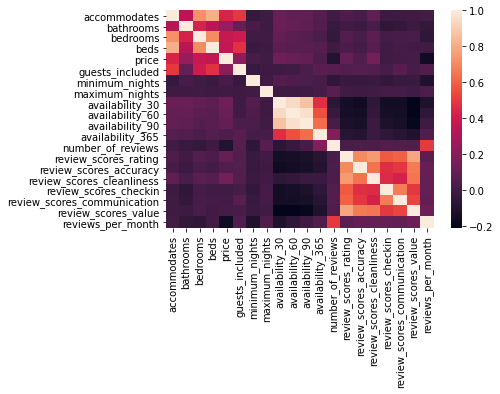

In [ ]:
## Check relationship to see 
sns.heatmap(lst.corr())

In [ ]:
# Remove nights according to corr()
drop_col(lst, 'night')

minimum_nights dropped
maximum_nights dropped


In [ ]:
# reviews score doesn't seem to have any relationship
drop_col(lst, 'scores')

review_scores_rating dropped
review_scores_accuracy dropped
review_scores_cleanliness dropped
review_scores_checkin dropped
review_scores_communication dropped
review_scores_value dropped


In [ ]:
# out of 3 availability, the 30 one has strongest corr()
drop_col(lst, '60')
drop_col(lst, '90')
drop_col(lst, '365')

availability_60 dropped
availability_90 dropped
availability_365 dropped


In [ ]:
# Review doens't seem helpful
drop_col(lst, 'review')

number_of_reviews dropped
first_review dropped
last_review dropped
reviews_per_month dropped


In [ ]:
# last wipe
drop_col(lst, 'policy')
drop_col(lst, 'instant')
drop_col(lst, 'updated')
drop_col(lst, 'deposit')
drop_col(lst, 'fee')

cancellation_policy dropped
instant_bookable dropped
calendar_updated dropped
security_deposit dropped
cleaning_fee dropped


In [ ]:
list(lst.columns)

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'guests_included',
 'extra_people',
 'availability_30']

In [ ]:
lst['extra_people'].fillna('$0', inplace=True)                               
lst['extra_people'] = lst['extra_people'].apply(price_conv)

In [ ]:
lst['host_response_rate'].fillna('0%', inplace=True) 
lst['host_acceptance_rate'].fillna('0%', inplace=True)

lst['host_response_rate'] = lst['host_response_rate'].apply(rate_conv)
lst['host_acceptance_rate'] = lst['host_acceptance_rate'].apply(rate_conv)

In [ ]:
lst.head()

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,availability_30
0,NaN,0.0,0.0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,1,0.0,0
1,within an hour,100.0,100.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,0,0.0,26
2,within a few hours,100.0,88.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,1,20.0,19
3,within a few hours,100.0,50.0,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,2,25.0,6
4,within an hour,100.0,100.0,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,1,0.0,13


<AxesSubplot:>

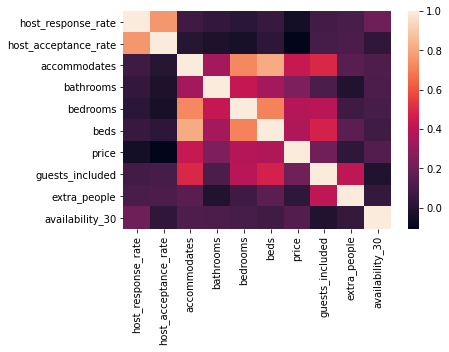

In [ ]:
sns.heatmap(lst.corr())

In [ ]:
lst.dropna(inplace=True)

### 2. Categorical Encoding

In [ ]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 1 to 3584
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      3086 non-null   object 
 1   host_response_rate      3086 non-null   float64
 2   host_acceptance_rate    3086 non-null   float64
 3   neighbourhood_cleansed  3086 non-null   object 
 4   property_type           3086 non-null   object 
 5   room_type               3086 non-null   object 
 6   accommodates            3086 non-null   int64  
 7   bathrooms               3086 non-null   float64
 8   bedrooms                3086 non-null   float64
 9   beds                    3086 non-null   float64
 10  bed_type                3086 non-null   object 
 11  price                   3086 non-null   float64
 12  guests_included         3086 non-null   int64  
 13  extra_people            3086 non-null   float64
 14  availability_30         3086 non-null   

In [ ]:
# instantiatae label encoder
le = LabelEncoder()

In [ ]:
lst['room_type'].value_counts()

Entire home/apt    1855
Private room       1163
Shared room          68
Name: room_type, dtype: int64

In [ ]:
cat = list(lst.select_dtypes(include='object').columns)
cat

['host_response_time',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type']

In [ ]:
for c in cat:
    lst[c] = le.fit_transform(lst[c])
    lst[c].unique()

In [ ]:
lst['room_type'].value_counts()

0    1855
1    1163
2      68
Name: room_type, dtype: int64

### 3. Data Scaling

In [ ]:
scaler = preprocessing.StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(lst))
scale_df.columns = lst.columns
scale_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,availability_30
0,0.961319,0.398039,0.722517,1.00953,-0.567467,1.079367,-0.603790,-0.447278,-0.344302,-0.606131,0.178012,-0.909484,-1.331900,-0.589260,1.562847
1,-0.351930,0.398039,0.169873,1.00953,-0.567467,1.079367,-0.603790,-0.447278,-0.344302,-0.606131,0.178012,-0.909484,-0.421749,0.426609,0.897377
2,-0.351930,0.398039,-1.580166,1.00953,1.810040,1.079367,0.495176,-0.447278,-0.344302,0.353110,0.178012,-0.823948,0.488403,0.680576,-0.338496
3,0.961319,0.398039,0.722517,1.00953,1.810040,1.079367,-0.603790,0.524080,-0.344302,0.353110,0.178012,-0.789733,-0.421749,-0.589260,0.326974
4,-0.351930,0.398039,0.492249,1.00953,0.451464,1.079367,-0.603790,-0.447278,-0.344302,-0.606131,0.178012,-0.823948,-0.421749,-0.589260,-0.433563


### 4.1 Model Training - Data Splitting

In [ ]:
X =  lst.drop('price', axis=1)
y = lst['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

###  4.2 Model Traing - Data Modeling

In [ ]:
# instantiate
lr = LinearRegression(normalize=True)

# fitting
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

# R^2
r2_test = r2_score(y_test, y_pred)

In [ ]:
coef = lr.coef_
index = np.argsort((coef))

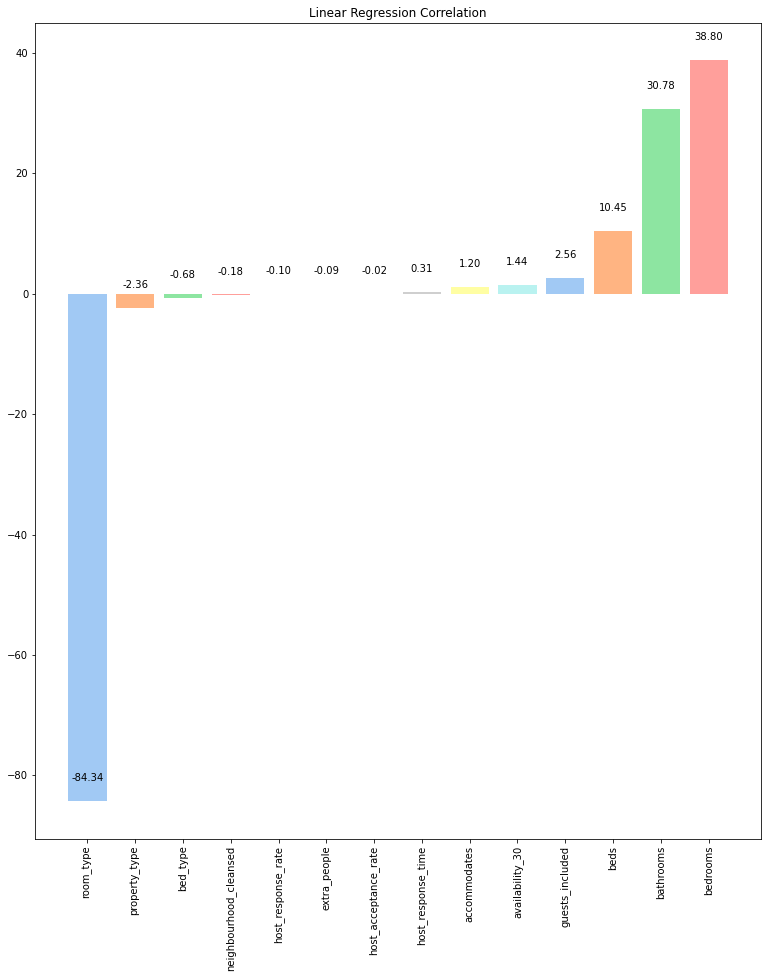

In [ ]:
x = range(len(X.columns))
y = coef[index][:len(X.columns)]

plt.figure(figsize=(13,15))
ax = plt.subplot()

ax.set_xticks(x)
ax.set_xticklabels(X.columns[index][:len(X.columns)], rotation=90)
ax.set_title('Linear Regression Correlation')
plt.bar(x, y, color=sns.color_palette('pastel'),align='center')

# Make some labels.
for rect, label in zip(ax.patches, y):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, 
        height + 3, 
        '{:.2f}'.format(label),
        ha='center', va='bottom'
    )
plt.show()

Result / Conclusion: 
- Room type has the most influence on price. The reason why it's negative is because when I do label encode, apartment=0, privateroom=1, shareroom=2. The bigger the room, the higher the price or the lower the number, the higher the room.
- Accommodations in general is the second most influence features that affect the price